<a href="https://colab.research.google.com/github/19PA1A0495/defect_detection/blob/main/dd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import matplotlib.image as mpimg
import os

In [13]:
import pathlib
dataset_path = "/content/drive/MyDrive/NEU Metal Surface Defects Data"
data_dir = pathlib.Path(dataset_path)


In [14]:
train_dir = '/content/drive/MyDrive/NEU Metal Surface Defects Data/train'
val_dir = '/content/drive/MyDrive/NEU Metal Surface Defects Data/valid'
test_dir='/content/drive/MyDrive/NEU Metal Surface Defects Data/test'

In [10]:
batch_size=30
img_height=200
img_width=200

In [11]:

image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True, color_mode='grayscale',
                                                target_size=(img_width,img_height),
                                                class_mode='sparse'
                                                )

Found 1650 images belonging to 6 classes.


In [15]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(img_width,img_height),  color_mode='grayscale',
                                                 class_mode='sparse')

Found 72 images belonging to 6 classes.


In [16]:
model = tf.keras.Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_width,img_height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6))

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
epochs = 20

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
55/55 [==============================] - 368s 7s/step - loss: 1.5095 - accuracy: 0.3594 - val_loss: 1.2526 - val_accuracy: 0.3333
Epoch 2/20
55/55 [==============================] - 72s 1s/step - loss: 0.8613 - accuracy: 0.6745 - val_loss: 0.6631 - val_accuracy: 0.7361
Epoch 3/20
55/55 [==============================] - 72s 1s/step - loss: 0.6146 - accuracy: 0.7721 - val_loss: 0.2477 - val_accuracy: 0.9583
Epoch 4/20
55/55 [==============================] - 72s 1s/step - loss: 0.4992 - accuracy: 0.8145 - val_loss: 0.5542 - val_accuracy: 0.8194
Epoch 5/20
55/55 [==============================] - 72s 1s/step - loss: 0.4472 - accuracy: 0.8352 - val_loss: 0.3189 - val_accuracy: 0.8750
Epoch 6/20
55/55 [==============================] - 72s 1s/step - loss: 0.3994 - accuracy: 0.8582 - val_loss: 0.2891 - val_accuracy: 0.8889
Epoch 7/20
55/55 [==============================] - 71s 1s/step - loss: 0.3641 - accuracy: 0.8697 - val_loss: 0.2034 - val_accuracy: 0.9583
Epoch 8/20
55/55 [=

Text(0.5, 1.0, 'Training and Validation Accuracy')

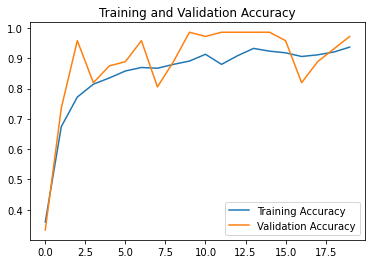

In [19]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

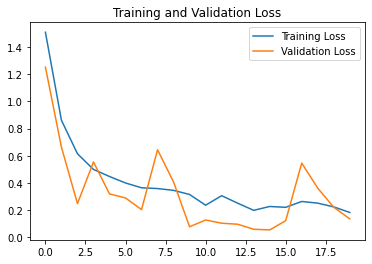

In [20]:
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()